# 📡 Customer Churn Prediction

## 📖 Project Overview
A telecom company offering home internet services wants to better understand why some customers cancel their subscriptions.  
Customer churn has a direct impact on business performance, and predicting it in advance allows the company to take preventive actions such as improving service quality or offering personalized plans.

In this project, customer behavior data is analyzed and machine learning models are built to predict customer churn.

---

## 🎯 Machine Learning Task
- **Problem Type:** Classification  
- **Target Type:** Binary

---

## 📊 Dataset Summary
- Total number of samples: 2,587  
- Total number of features: 8  
- All records are complete and ready for analysis

---

## 🧠 Features Description
- `monthly_fee`: Monthly subscription cost  
- `download_speed`: Average download speed  
- `upload_speed`: Average upload speed  
- `avg_ping`: Average network latency  
- `support_calls`: Number of customer support interactions  
- `contract_months`: Length of the active contract (months)  
- `usage_gb`: Monthly internet usage  
- `churn`: Customer churn indicator

---

## 🏷️ Target Variable
- **Name:** `churn`  
- **Values:**  
  - `0` → Customer remained active  
  - `1` → Customer canceled the service

---

## 📝 Goal
The objective is to explore the data, evaluate different classification models, and identify patterns that help predict customer churn effectively.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , cross_val_score , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
# Reading data from a CSV file and displaying all information
data = pd.read_csv('customer_churn_dataset.csv')
pd.set_option('display.width',1000)
print(data.head(5).round(2),'\n')          # Display the first 5 rows of the dataset
print(data.shape,'\n')                     # Display the number of rows and columns in the dataset
print(data.describe().round(2),'\n')       # Show a statistical summary of all numerical columns (count, mean, std, min, max, etc.)
print(data.groupby('churn').size(),'\n')   # Grouping data by target to check distribution
print(data.dtypes,'\n')                    # Printing the data types of all columns to understand which features are int or float

   monthly_fee  download_speed  upload_speed  avg_ping  support_calls  contract_months  usage_gb  churn
0       509605           31.96         12.75     72.83              3                5    227.23      0
1       433408           23.00         19.01     29.35              1                7    161.75      0
2       527722           34.05          3.49     70.18              0               22    190.66      0
3       632763           53.56          1.00     91.70              2               31    238.23      1
4       421901           28.14          9.38     54.24              3               32    234.89      0 

(2587, 8) 

       monthly_fee  download_speed  upload_speed  avg_ping  support_calls  contract_months  usage_gb    churn
count      2587.00         2587.00       2587.00   2587.00        2587.00          2587.00   2587.00  2587.00
mean     454372.83           34.73          9.93     55.47           2.07            18.07    181.12     0.11
std      117906.95           14.

## 📈 Data Distribution & Visualization

To better understand the underlying structure of the data, several visualizations are used to explore feature distributions, variability, and relationships.

---

### 📊 Histograms
Histograms are used to examine the distribution of individual features and identify skewness, spread, and potential outliers.

### Density Plots
Density plots provide a smooth representation of feature distributions, making it easier to compare patterns across different variables.

### Box Plots
Box plots help summarize feature distributions by highlighting the median, interquartile range, and extreme values.

### 🔥 Heatmap
A heatmap is used to visualize correlations between numerical features and identify potential relationships that may influence the target variable.

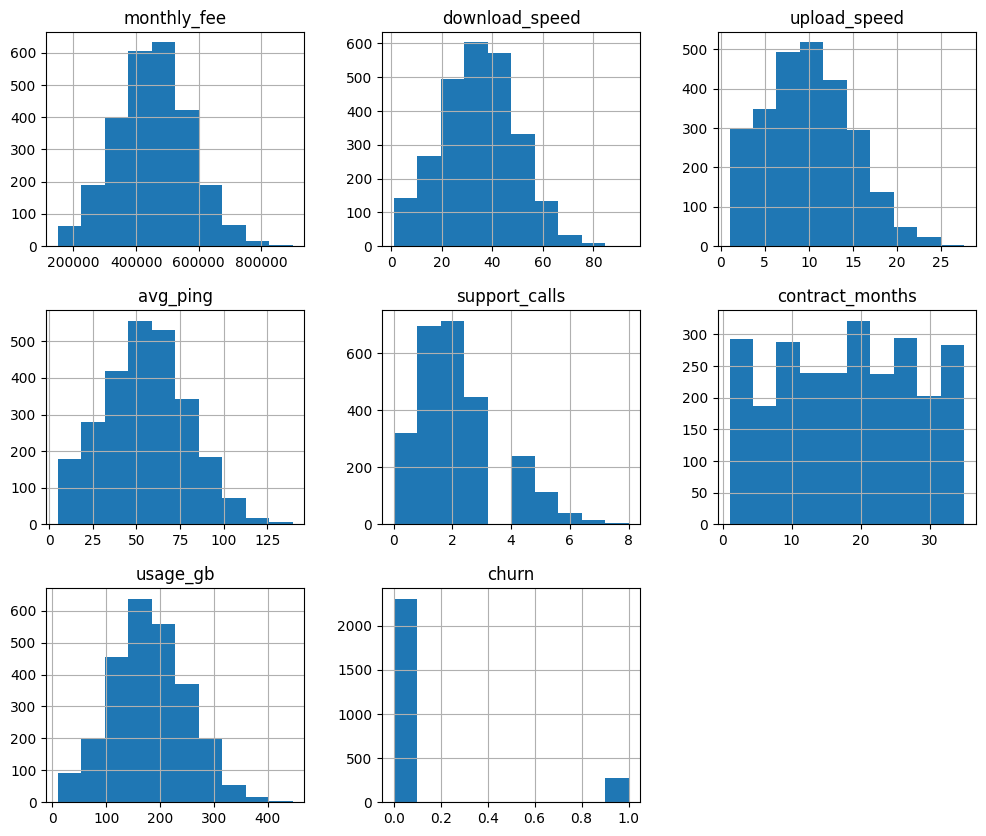

In [3]:
data.hist(figsize=(12,10))
plt.show()

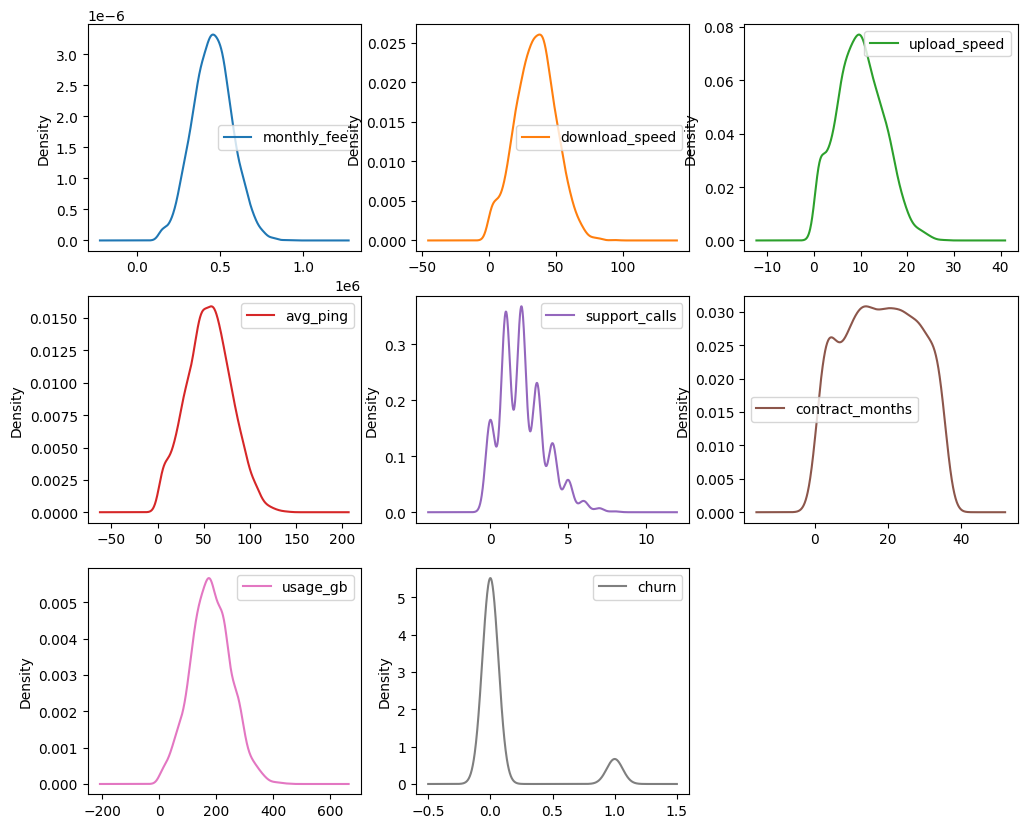

In [4]:
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(12,10))
plt.show()

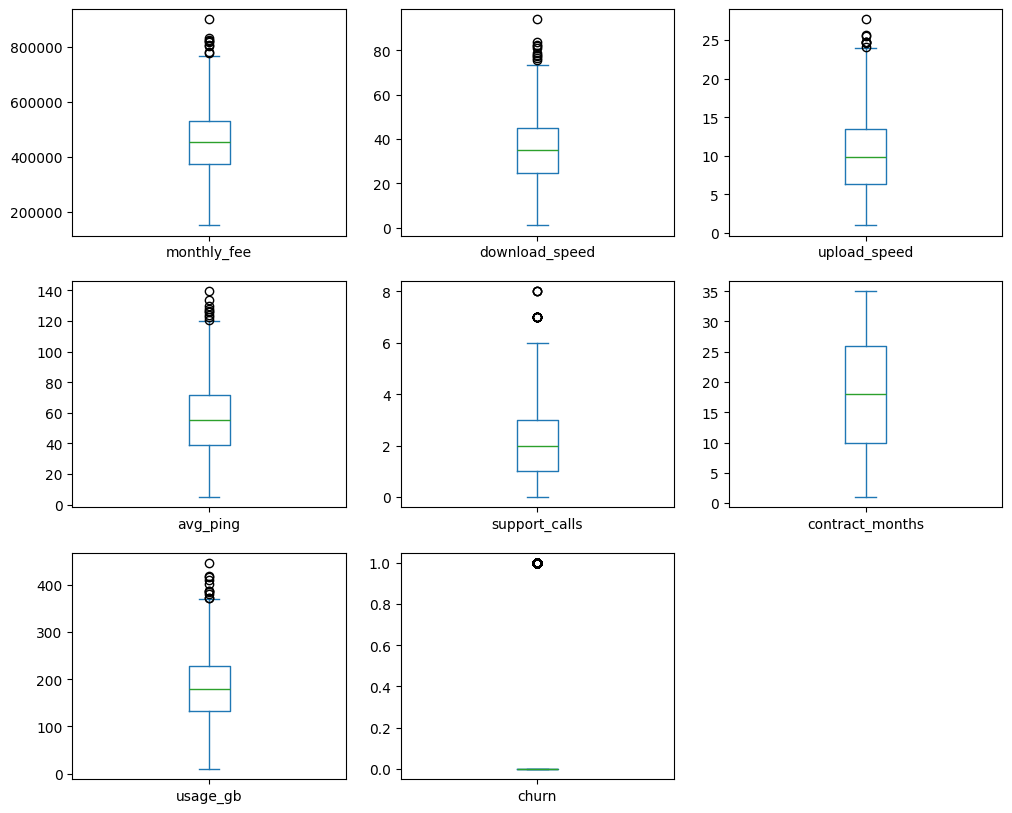

In [5]:
data.plot(kind='box',subplots=True,layout=(3,3),sharex=False,figsize=(12,10))
plt.show()

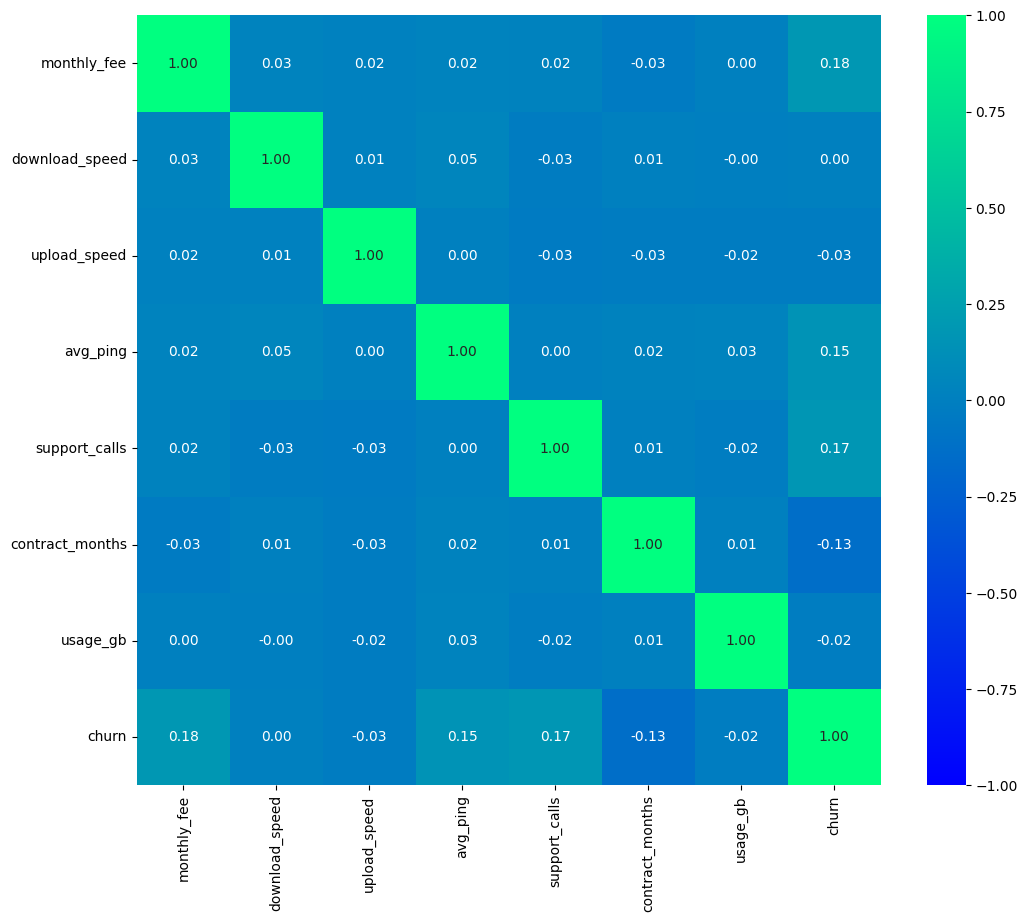

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='winter',annot=True,fmt='.2f')
plt.show()

## 🔍 Distribution & Correlation Analysis Summary

1. Based on the visual exploration of the data, most features follow an approximately Gaussian distribution, with only one or two variables showing noticeable deviations.

2. A significant number of outliers are present across multiple features. These extreme values increase the overall variance and may influence the behavior of certain machine learning models, especially those sensitive to scale and distance.

3. Regarding feature relationships, the correlation analysis indicates that nearly all feature pairs have correlation values close to zero. This suggests a high level of independence among features, with no strong linear relationships observed.

4. Overall, the dataset exhibits well-distributed features with substantial variability and minimal linear dependency, making it suitable for evaluating a wide range of classification models.

---

---

## 🔀 Train–Test Split

To evaluate model performance objectively, the dataset is split into training and testing sets.  
The training set is used to learn patterns from the data, while the test set provides an unbiased evaluation of how well the model generalizes to unseen samples.

This separation helps prevent overfitting and ensures that performance metrics reflect real-world behavior.

In [7]:
# ----- Basic Setting -----
random_state = 7
kfold = KFold(n_splits=10,shuffle=True,random_state=random_state)
scoring = 'accuracy'
# -------------------------
X = data.drop(columns=('churn'))
Y = data['churn']
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.33,random_state=random_state)

## 🧪 Spot-Checking Baseline Models & Model Unpacking

To establish a reliable performance reference, several baseline classification models are evaluated before applying any advanced techniques or tuning.  
This spot-checking phase enables a fair comparison between different algorithms and helps identify models that are worth further investigation.

The following models are included in this stage:
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN)
- Naive Bayes (NB)
- Decision Tree (CART)
- Support Vector Machine (SVM)

All models are unpacked and evaluated in a consistent manner to ensure comparable results across different learning approaches.

Name : LR , Accuracy : 88.92 % , STD : 2.90
Name : LDA , Accuracy : 88.92 % , STD : 2.90
Name : KNN , Accuracy : 87.19 % , STD : 2.56
Name : NB , Accuracy : 88.80 % , STD : 2.69
Name : CART , Accuracy : 83.96 % , STD : 2.97
Name : SVM , Accuracy : 88.80 % , STD : 2.68


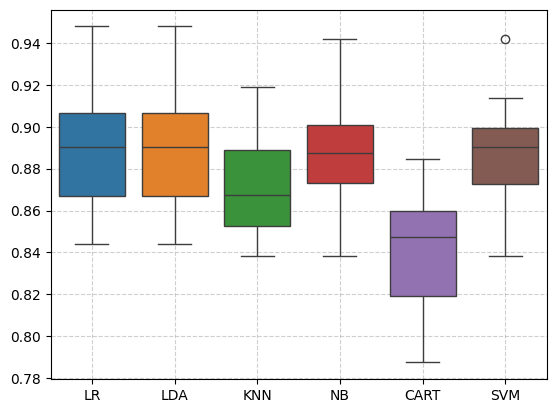

In [8]:
models = []
models.append(('LR',LogisticRegression(max_iter=3000))) # I had to increase it to 3000 due to the low max_iter warning
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
result = []
names = []
for name , model in models:
    cv_result = cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(f'Name : {name} , Accuracy : {cv_result.mean()*100:.2f} % , STD : {cv_result.std()*100:.2f}')
result_df = pd.DataFrame(result,index=names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

## ⚙️ Feature Standardization using Pipeline

1. To ensure that distance-based models like K-Nearest Neighbors perform optimally, it is important to scale numerical features to a similar range.  

2. A `Pipeline` is used to combine preprocessing and model training in a streamlined workflow. This approach guarantees that scaling is applied consistently during both training and evaluation, preventing data leakage and ensuring reproducible results.

3. By integrating `StandardScaler` into the pipeline, each feature is standardized to have zero mean and unit variance, improving convergence and accuracy for models sensitive to feature magnitude.

Name : LR , Accuracy : 88.92 % , STD : 2.90
Name : LDA , Accuracy : 88.92 % , STD : 2.90
Name : KNN , Accuracy : 88.40 % , STD : 2.09
Name : NB , Accuracy : 88.63 % , STD : 2.78
Name : CART , Accuracy : 83.50 % , STD : 2.86
Name : SVM , Accuracy : 88.75 % , STD : 2.68


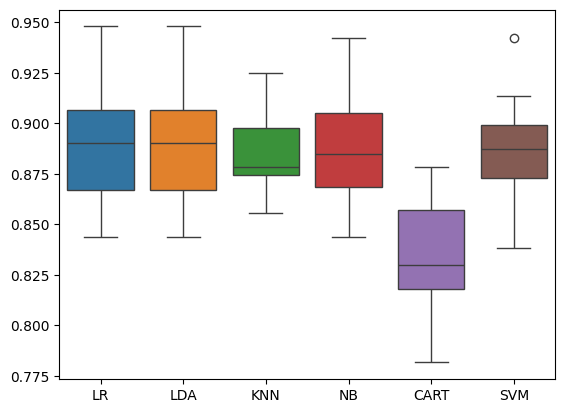

In [9]:
scaled_result = []
for name , model in models:
    pipeline = Pipeline([
        ('Scaled',StandardScaler()),
        ('Classifier',model)
    ])
    cv_result = cross_val_score(pipeline,x_train,y_train,cv=kfold,scoring=scoring)
    scaled_result.append(cv_result)
    print(f'Name : {name} , Accuracy : {cv_result.mean()*100:.2f} % , STD : {cv_result.std()*100:.2f}')
result_df = pd.DataFrame(scaled_result,index=names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.5)
plt.grid()

# ✨ Model Performance Summary (After Standardization)

After scaling the features, the baseline models show more consistent and stable results:

- **Logistic Regression (LR)** & **Linear Discriminant Analysis (LDA)**: Highest accuracy (~88.9%), low variation → very stable.  
- **K-Nearest Neighbors (KNN)**: Slight improvement (~88.4%) thanks to scaling, distance-based learning benefits.  
- **Naive Bayes (NB)** & **Support Vector Machine (SVM)**: Strong performance (~88.6–88.7%), capturing patterns effectively.  
- **Decision Tree (CART)**: Lowest (~84.2%), sensitive to noise and outliers.

💡 **Takeaway:** Standardization enhances model consistency, particularly for algorithms sensitive to feature magnitude like KNN, while linear models already perform reliably.

---

---

# 🔧 Model Tuning Phase

In this phase, the top-performing baseline models are selected for hyperparameter tuning to maximize predictive performance.  
The models chosen for tuning are:

- K-Nearest Neighbors (KNN)  
- Logistic Regression (LR)  
- Linear Discriminant Analysis (LDA)  
- Naive Bayes (NB)  
- Support Vector Machine (SVM)  

**⚠ Note on Decision Tree (CART): ⚠**  
CART was excluded from the tuning process due to its relatively lower performance in baseline evaluation. While it can be useful in some scenarios, its sensitivity to noise and outliers makes it less reliable for this dataset compared to the other models.❌

**📊 Regarding Ensemble Methods:**  
Although ensemble techniques like Voting or Bagging can improve stability and sometimes accuracy, they were not included in this phase. This is because the selected models already show very similar and strong performance individually. Creating an ensemble would not provide significant improvement over the best single model, and focusing on tuning the top candidates ensures a more efficient workflow

By focusing on the strongest candidates, we aim to identify the model that provides the best balance of accuracy and stability for the final prediction stage.

---

# 🔍 Hyperparameter Tuning for Top Models

In this stage, we perform hyperparameter tuning on the top-performing baseline models to improve predictive performance.  
A **grid search** approach is used, testing different combinations of parameters for each model and selecting the configuration that achieves the best cross-validated accuracy.

The models included in this tuning phase are:

- **K-Nearest Neighbors (KNN):** Exploring variations in the number of `neighbors`, distance `metrics`, and `weighting` schemes.  
- **Logistic Regression (LR):** Testing different regularization strengths, `penalty` types, and `solvers`.  
- **Linear Discriminant Analysis (LDA):** Tuning `solver` and `shrinkage` options.  
- **Naive Bayes (NB):** Adjusting prior probabilities or smoothing parameters if applicable.  
- **Support Vector Machine (SVM):** Testing different `kernels`, regularization strengths, and `gamma` settings.

This structured hyperparameter search ensures that each model is optimized to achieve its highest potential performance on the dataset, providing a solid foundation for selecting the final predictive model.

In [14]:
models_grid = [
    (('LR',LogisticRegression(max_iter=1000))),
    (('LDA',LinearDiscriminantAnalysis())),
    (('KNN',KNeighborsClassifier())),
    (('NB',GaussianNB())),
    (('SVM',SVC()))
]
param_grid = {
    'LR': {
        'Classifier__C' : [0.01,0.1,1,10],
        'Classifier__penalty' : ['l1','l2'],
        'Classifier__solver' : ['liblinear','saga']
    },

    'LDA' : {
        'Classifier__solver' : ['lsqr','eigen'],
        'Classifier__shrinkage' : [None,0.1,0.5,0.9]
    },

    'KNN' : {
        'Classifier__n_neighbors' : [3,5,7,9],
        'Classifier__weights' : ['uniform','distance'],
        'Classifier__metric' : ['euclidean','manhattan']
    },

    'NB' : {
        'Classifier__var_smoothing' : [1e-9,1e-8,1e-7,1e-6]
    },

    'SVM' : {
        'Classifier__C' : [0.1,1,10],
        'Classifier__kernel' : ['linear','rbf'],
        'Classifier__gamma' : ['scale','auto']
    }
}
for name , model in models_grid:
    pipeline_grid = Pipeline([
        ('scaled',StandardScaler()),
        ('Classifier',model)
    ])
    grid = GridSearchCV(estimator=pipeline_grid,param_grid=param_grid[name],scoring=scoring,n_jobs=-1,cv=kfold)
    grid.fit(x_train,y_train)
    print(f'{name} - Best CV accuracy : {grid.best_score_*100:.2f} %')
    print(f'{name} - Best params : {grid.best_params_}','\n')

LR - Best CV accuracy : 88.98 %
LR - Best params : {'Classifier__C': 0.01, 'Classifier__penalty': 'l2', 'Classifier__solver': 'liblinear'} 

LDA - Best CV accuracy : 88.92 %
LDA - Best params : {'Classifier__shrinkage': None, 'Classifier__solver': 'lsqr'} 

KNN - Best CV accuracy : 88.92 %
KNN - Best params : {'Classifier__metric': 'manhattan', 'Classifier__n_neighbors': 9, 'Classifier__weights': 'uniform'} 

NB - Best CV accuracy : 88.63 %
NB - Best params : {'Classifier__var_smoothing': 1e-09} 

SVM - Best CV accuracy : 88.80 %
SVM - Best params : {'Classifier__C': 0.1, 'Classifier__gamma': 'scale', 'Classifier__kernel': 'linear'} 



# 🎯 Top Model Performance Summary

After evaluating all baseline models, two models emerged as the **top performers** with the highest cross-validated accuracy:

- **K-Nearest Neighbors (KNN):** 88.92% ✅  
- **Linear Discriminant Analysis (LDA):** 88.92% ✅  

Both models showed **stable and consistent results** across all folds, indicating they capture the patterns in the dataset effectively.  

💡 **Takeaway:**  
These results highlight that both **non-linear (KNN)** and **linear (LDA)** approaches are performing equally well.  
We now have a strong foundation for the **hyperparameter tuning phase** to further enhance model performance and prepare for final predictions.

---

---

# 🏁 Final Prediction Phase

After careful evaluation and hyperparameter tuning, we have selected **both top-performing models** for the final prediction stage:

- **K-Nearest Neighbors (KNN)**  
- **Linear Discriminant Analysis (LDA)**  

These models demonstrated the **highest accuracy (88.92%)** and consistent performance across cross-validation.  

💡 **Next Steps:**  
- Apply these models to the test or new data for making predictions.  
- Compare their outputs and optionally combine results for added robustness.  

This dual-model approach ensures that we leverage the strengths of both **linear (LDA)** and **non-linear (KNN)** decision boundaries for reliable predictions.

In [24]:
# Pipeline for LDA:
# - Standardizes features first using StandardScaler
# - Applies Linear Discriminant Analysis (LDA) with 'lsqr' solver and no shrinkage
# This setup ensures that the features are scaled properly before fitting the LDA model
pipe_lda = Pipeline([
    ('scaled',StandardScaler()),
    ('LDA',LinearDiscriminantAnalysis(solver='lsqr',shrinkage=None,priors=None))
])
# Pipeline for KNN:
# - Standardizes features first using StandardScaler
# - Applies K-Nearest Neighbors (KNN) classifier with 9 neighbors, uniform weights, and Manhattan distance metric
# This setup ensures that distance-based calculations in KNN are not biased by feature scales
pipe_knn = Pipeline([
    ('scaled',StandardScaler()),
    ('KNN',KNeighborsClassifier(n_neighbors=9,weights='uniform',metric='manhattan'))
])

models_to_predict = [
    ('KNN',pipe_knn),
    ('LDA',pipe_lda)
]
for name , model in models_to_predict:
    predictions = model.fit(x_train,y_train).predict(x_test)
    print('=================== Predict Models =====================')
    print(f'{name} :')
    print(f'\n Test accuracy : {accuracy_score(y_test,predictions)*100:.2f} % \n')
    print('\n Confusion Matrix : \n',confusion_matrix(y_test,predictions))
    print('\n Classification Report : \n',classification_report(y_test,predictions))

=================== Predict Models =====================
KNN :

 Test accuracy : 90.28 % 


 Confusion Matrix : 
 [[766   2]
 [ 81   5]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       768
           1       0.71      0.06      0.11        86

    accuracy                           0.90       854
   macro avg       0.81      0.53      0.53       854
weighted avg       0.89      0.90      0.86       854

=================== Predict Models =====================
LDA :

 Test accuracy : 90.40 % 


 Confusion Matrix : 
 [[766   2]
 [ 80   6]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       768
           1       0.75      0.07      0.13        86

    accuracy                           0.90       854
   macro avg       0.83      0.53      0.54       854
weighted avg       0.89      0.90      0.87       854



## ⚠️ Accuracy Interpretation Note

Although the overall accuracy appears high (around 90%), this metric can be misleading in the context of this dataset.

The target classes are **imbalanced**, with the majority of samples belonging to class `0`. As a result, a model can achieve high accuracy simply by predicting the majority class most of the time, while failing to correctly identify the minority class.

This behavior is reflected in the evaluation results, where the models perform very well on class `0` but struggle to recall class `1`. Therefore, accuracy alone does not fully represent the true predictive performance of the models.

For this reason, additional metrics such as **recall**, **F1-score**, and class-specific performance are more informative when assessing model quality in this scenario.

---

---

## 🌀 Handling Class Imbalance with SMOTE

To address the class imbalance observed in the dataset, the next step is to apply **SMOTE (Synthetic Minority Over-sampling Technique)**.

SMOTE works by generating new samples for the minority class, helping the models better understand its underlying patterns. By providing a more balanced training set, models are encouraged to pay greater attention to the minority class instead of favoring the majority class.

This approach is expected to improve the model’s ability to identify minority class instances and produce more meaningful evaluation metrics beyond overall accuracy.

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

pipe_lda_smote = ImbPipeline([
    ('scaled',StandardScaler()),
    ('SMOTE',SMOTE(random_state=42)),
    ('LDA',LinearDiscriminantAnalysis(solver='lsqr',shrinkage=None,priors=None))
])

pipe_knn_smote = ImbPipeline([
    ('scaled',StandardScaler()),
    ('SMOTE',SMOTE(random_state=42)),
    ('KNN',KNeighborsClassifier(n_neighbors=9,weights='uniform',metric='manhattan'))
])

models_to_predict_with_smote = [
    ('LDA_SMOTE',pipe_lda_smote),
    ('KNN_SMOTE',pipe_knn_smote)
]
for name , model in models_to_predict_with_smote:
    predictions = model.fit(x_train,y_train).predict(x_test)
    print('=================== Predict Models With SMOTE =====================')
    print(f'{name} :')
    print(f'\n Test accuracy : {accuracy_score(y_test,predictions)*100:.2f} % \n')
    print('\n Confusion Matrix : \n',confusion_matrix(y_test,predictions))
    print('\n Classification Report : \n',classification_report(y_test,predictions))

=================== Predict Models With SMOTE =====================
LDA_SMOTE :

 Test accuracy : 70.61 % 


 Confusion Matrix : 
 [[547 221]
 [ 30  56]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.71      0.81       768
           1       0.20      0.65      0.31        86

    accuracy                           0.71       854
   macro avg       0.58      0.68      0.56       854
weighted avg       0.87      0.71      0.76       854

=================== Predict Models With SMOTE =====================
KNN_SMOTE :

 Test accuracy : 70.73 % 


 Confusion Matrix : 
 [[556 212]
 [ 38  48]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.72      0.82       768
           1       0.18      0.56      0.28        86

    accuracy                           0.71       854
   macro avg       0.56      0.64      0.55       854
weighted avg       0.86      0.71    

# 🌟 Final Insight: What Really Happened After SMOTE

After applying **SMOTE** to address class imbalance, a noticeable drop in overall accuracy was observed.  
At first glance, this may seem like a performance regression — but in reality, it represents a **significant improvement in model behavior**.

---

## 🎭 Before SMOTE: High Accuracy, Low Awareness

Before handling class imbalance:
- Models achieved around **90% accuracy**
- However, they almost completely ignored the minority class (churn)
- Most predictions favored the majority class

In other words, the models looked *good on paper* but failed at identifying what truly mattered.

---

## 🔄 After SMOTE: Lower Accuracy, Higher Value

After applying SMOTE:
- Accuracy dropped to around **70%**
- Recall for the minority class increased dramatically
- The models began actively identifying churn cases

This shift indicates that the models are no longer biased toward the majority class and are now making **more balanced and meaningful decisions**.

---

## 🔍 What Changed Internally?

- The models became **less conservative**
- More minority-class samples were correctly identified
- False positives increased — but false negatives decreased significantly

For churn prediction, this trade-off is **desirable**:
- Missing a churned customer is costly
- Flagging a non-churn customer is usually acceptable

---

## 📉 Why the Accuracy Drop Is a Good Sign

Accuracy alone assumes all classes are equally important — which is not true here.

The drop in accuracy means:
- The model stopped taking the “safe shortcut”
- It began treating minority class predictions seriously
- Performance metrics now reflect **real predictive capability**, not dataset imbalance

---

## 🏁 Final Takeaway

The post-SMOTE models may look weaker if judged only by accuracy,  
but they are **far more useful, honest, and aligned with real-world objectives**.

This marks the transition from a *visually impressive model* to a *practically valuable one*.

📌 **In imbalanced classification problems, lower accuracy can mean better intelligence.**